## Docker-ontology 
Created by Nikolay Pavlychev

### Import ontology and visualization

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from rdflib import Graph, URIRef

from rdflib.plugins import sparql

In [2]:
graph = Graph()
graph.parse('docker-ontology.ttl', format='turtle')

<Graph identifier=N276e2442312840058edb0eb1e4496cdb (<class 'rdflib.graph.Graph'>)>

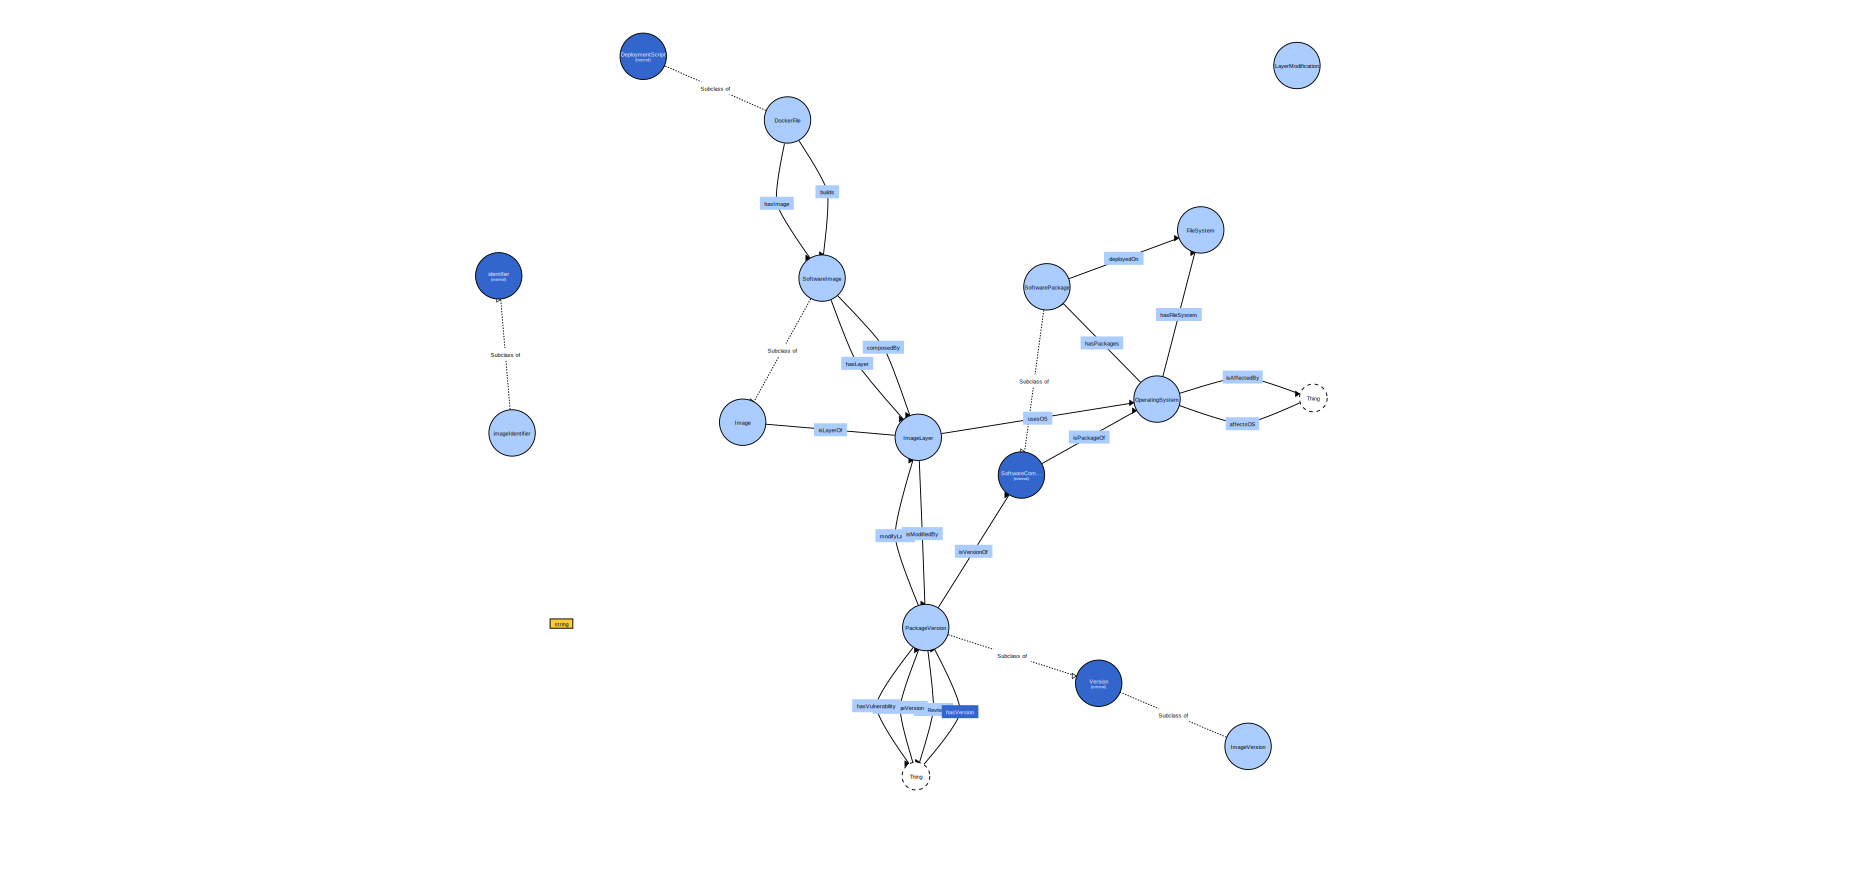

In [10]:
# URL VOWL
# http://vowl.visualdataweb.org/webvowl.html 

ontology_viz = '/home/nikolaypavlychev/knowledge_graph_project/docker-ontology.svg'

from IPython.display import SVG, display

display(SVG(ontology_viz))


## Loading triples of individuals

In [20]:
data = pd.read_csv('/home/nikolaypavlychev/knowledge_graph_project/dockerpedia_individuals_random.csv', sep=' ', names = ['subject', 'predicate', 'object', 'end'], 
                   dtype=str,error_bad_lines=False)
data.head()

/tmp/ipykernel_63374/3973399637.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/home/nikolaypavlychev/knowledge_graph_project/dockerpedia_individuals_random.csv', sep=' ', names = ['subject', 'predicate', 'object', 'end'],
b'Skipping line 204572: expected 4 fields, saw 6\nSkipping line 204603: expected 4 fields, saw 5\nSkipping line 204614: expected 4 fields, saw 8\nSkipping line 204694: expected 4 fields, saw 9\nSkipping line 204742: expected 4 fields, saw 17\nSkipping line 204746: expected 4 fields, saw 10\nSkipping line 204762: expected 4 fields, saw 5\nSkipping line 204783: expected 4 fields, saw 6\nSkipping line 204815: expected 4 fields, saw 6\nSkipping line 204841: expected 4 fields, saw 6\nSkipping line 204843: expected 4 fields, saw 9\nSkipping line 204844: expected 4 fields, saw 13\nSkipping line 204846: expected 4 fields, saw 6\nSkipping line 204867: expect

,subject,predicate,object,end
0,<http://dockerpedia.inf.utfsm.cl/resource/Imag...,<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>,<http://www.semanticweb.org/root/ontologies/20...,.
1,<http://dockerpedia.inf.utfsm.cl/resource/Imag...,<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>,<http://www.semanticweb.org/root/ontologies/20...,.
2,<http://dockerpedia.inf.utfsm.cl/resource/Imag...,<http://www.semanticweb.org/root/ontologies/20...,<http://dockerpedia.inf.utfsm.cl/resource/Soft...,.
3,<http://dockerpedia.inf.utfsm.cl/resource/Imag...,<http://www.semanticweb.org/root/ontologies/20...,<http://dockerpedia.inf.utfsm.cl/resource/Soft...,.
4,<http://dockerpedia.inf.utfsm.cl/resource/Imag...,<http://www.semanticweb.org/root/ontologies/20...,<http://dockerpedia.inf.utfsm.cl/resource/Soft...,.


In [21]:
data['subject'] = data['subject'].astype(str) 
data['predicate'] = data['predicate'].astype(str)   
data['object'] = data['object'].astype(str)  

In [22]:
pattern_wr = r'<.*$'
pattern_3 = r'\d.*-<'

def check(x):
    if re.search(pattern_wr, x):
        return x
    elif re.search(pattern_3, x):
        return re.sub(pattern_3, '<', x, count=0, flags=0)
        
    else:
        return x.replace('-', '_')

In [23]:
%%capture

import re

pattern = r'[0-9]*\^\^'

data = data.drop(columns=['end']).reset_index(drop=True)

data['subject'] = data['subject'].apply(lambda x: URIRef(re.sub(pattern, '', x, count=0, flags=0)))
data['predicate'] = data['predicate'].apply(lambda x: URIRef(re.sub(pattern, '', x, count=0, flags=0)))

data['object'] = data['object'].apply(lambda x: check(x))
data['object'] = data['object'].apply(lambda x: URIRef(re.sub(pattern, '', x, count=0, flags=0)))

# data['subject'] = data['subject'].apply(lambda x: URIRef(re.sub(pattern, '', x.replace('<','').replace('>',''), count=0, flags=0)))
# data['predicate'] = data['predicate'].apply(lambda x: URIRef(re.sub(pattern, '', x.replace('<','').replace('>',''), count=0, flags=0)))
# data['object'] = data['object'].apply(lambda x: URIRef(re.sub(pattern, '', x.replace('<','').replace('>',''), count=0, flags=0)))


In [24]:
data.head(10)

,subject,predicate,object
0,<http://dockerpedia.inf.utfsm.cl/resource/Imag...,<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>,<http://www.semanticweb.org/root/ontologies/20...
1,<http://dockerpedia.inf.utfsm.cl/resource/Imag...,<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>,<http://www.semanticweb.org/root/ontologies/20...
2,<http://dockerpedia.inf.utfsm.cl/resource/Imag...,<http://www.semanticweb.org/root/ontologies/20...,<http://dockerpedia.inf.utfsm.cl/resource/Soft...
3,<http://dockerpedia.inf.utfsm.cl/resource/Imag...,<http://www.semanticweb.org/root/ontologies/20...,<http://dockerpedia.inf.utfsm.cl/resource/Soft...
4,<http://dockerpedia.inf.utfsm.cl/resource/Imag...,<http://www.semanticweb.org/root/ontologies/20...,<http://dockerpedia.inf.utfsm.cl/resource/Soft...
5,<http://dockerpedia.inf.utfsm.cl/resource/Imag...,<http://www.semanticweb.org/root/ontologies/20...,<http://dockerpedia.inf.utfsm.cl/resource/Soft...
6,<http://dockerpedia.inf.utfsm.cl/resource/Imag...,<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>,<http://www.semanticweb.org/root/ontologies/20...
7,<http://dockerpedia.inf.utfsm.cl/resource/Imag...,<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>,<http://www.semanticweb.org/root/ontologies/20...
8,<http://dockerpedia.inf.utfsm.cl/resource/Imag...,<http://www.semanticweb.org/root/ontologies/20...,<http://dockerpedia.inf.utfsm.cl/resource/Soft...
9,<http://dockerpedia.inf.utfsm.cl/resource/Imag...,<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>,<http://www.semanticweb.org/root/ontologies/20...


In [25]:
%%capture

data['output'] = data['subject'] + ' ' + data['predicate'] + ' ' + data['object'] + ' ' + '.'
data['output'].to_csv('dockerpedia_individuals_random_clear.csv', index=False,header=False)

In [5]:
len(graph.all_nodes())

47

In [25]:
for i in range(len(data)):
    graph.add((data['subject'][i], data['predicate'][i], data['object'][i]))
    


In [ ]:
graph.serialize(destination="docker-ontology-individuals-random.ttl", format="turtle")

In [ ]:
graph = Graph()
graph.parse('docker-ontology-individuals-random.ttl', format='turtle')


## SPARQL queries

### Получим все пакеты конкретного image 

In [34]:
query_results = graph.query("""PREFIX dov: <http://www.semanticweb.org/root/ontologies/2024/1/docker-ontology/vocab#>
                            PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT ?image ?software WHERE { 
  ?image a dov:SoftwareImage ;
  		 dov:containsSoftware ?software
} limit 100
 		
""")


### поскольку один слой может использоваться на нескольких изображениях, нам может быть интересно узнать, какие из них наиболее популярны:

In [ ]:
query_results = graph.query("""PREFIX dov: <http://www.semanticweb.org/root/ontologies/2024/1/docker-ontology/vocab#>
                            PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT ?layer (count(?layer) as ?count) WHERE {
  ?image a dov:SoftwareImage ;
         dov:composedBy ?layer .
} group by (?layer) order by desc(?count) limit 10
 		
""")

### выведем топ-10 самых используемых пакетов

In [ ]:
query_results = graph.query("""PREFIX dov: <http://www.semanticweb.org/root/ontologies/2024/1/docker-ontology/vocab#>
                            PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT ?packagename (count(?packagename) as ?count) WHERE {
  ?image a dov:SoftwareImage ;
  		 dov:containsSoftware ?software .
  ?package dov:hasVersion ?packageversion .
  ?package rdfs:label ?packagename .
} group by (?packagename) order by desc(?count) limit 10
 		
""")